This code file will be for my unitary calculator. I will use the perceval framework from quandela.

It occurs to me that a good way of going about it for my purposes is to just drum up some Haar-random unitary (with dimensions given by circuit mode number) and then do circuit decomposition from quandela. So then i should be able to obtain 'true values' for the program to infer, although then it isn't symbolically.

In [17]:
import datetime
import time
import numpy as np
from scipy.optimize import basinhopping
import random
import perceval as pcvl
import os
import math
import perceval as pcvl
import numpy as np
#from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
#from perceval.components import BS

In [18]:
np.random.seed(0)

N=4
#bs = pcvl.Circuit.generic_interferometer(N, lambda idx : pcvl.BS(theta=pcvl.P("theta_%d"%idx))//(0, pcvl.PS(pcvl.P("phi_%d"%idx))), shape="rectangle", depth = 2*N)
#Standard Clements scheme
#bs = pcvl.Circuit.generic_interferometer(N, lambda idx : pcvl.BS(theta=pcvl.P("theta_%d"%(2*idx)))//(0, pcvl.PS(pcvl.P("phi_%d"%(2*idx))))//pcvl.BS(theta=pcvl.P("theta_%d"%(2*idx+1)))//(0, pcvl.PS(pcvl.P("phi_%d"%(2*idx+1)))), shape="rectangle")
#Standard Reck scheme
bs = pcvl.Circuit.generic_interferometer(N, lambda idx : pcvl.BS(theta=pcvl.P("theta_%d"%(2*idx)))//(0, pcvl.PS(pcvl.P("phi_%d"%(2*idx))))//pcvl.BS(theta=pcvl.P("theta_%d"%(2*idx+1)))//(0, pcvl.PS(pcvl.P("phi_%d"%(2*idx+1)))), shape="triangle")

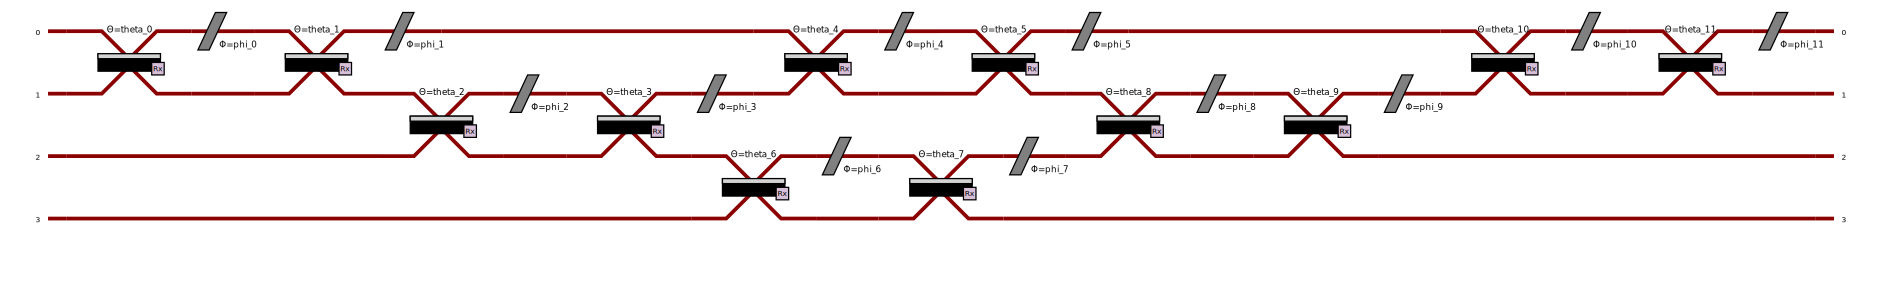

In [19]:
pcvl.pdisplay(bs, recursive = True)

In [20]:
#pcvl.pdisplay(bs.U)

Clements scheme
---------------


For N=2:

$\left[\begin{matrix}\left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} & i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}}\\i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) & - e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} + \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\end{matrix}\right]$

For N=3:

$\left[\begin{matrix}\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} & i \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} & - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)}\\i \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) & \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)} & i \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(- e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} + \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}}\\- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) & - i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) & - e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} + \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\end{matrix}\right]$

For N=4:

$\left[\begin{matrix}\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \cos{\left(\frac{\theta_{7}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} & i \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \cos{\left(\frac{\theta_{7}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} & - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5} + \phi_{7}\right)} & - i \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5} + \phi_{7}\right)}\\i \left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \cos{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & \left(\left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \sin{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(- e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} + \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(- \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \cos{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & i \left(- \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)} + \left(- \left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & \left(\left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)} - \left(- \left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}}\\\left(\left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} - \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \sin{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)} + \left(\left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} - \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} & i \left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)} + \left(- \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} - \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{6}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{6}}{2} \right)}\right) \cos{\left(\frac{\theta_{7}}{2} \right)}\right) \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} - \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)}\right) & \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} + \left(- \left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)} & i \left(\left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} - \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)}\right)\\- i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} \cos{\left(\frac{\theta_{8}}{2} \right)} + \sin{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) & \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)} + \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \left(e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} \cos{\left(\frac{\theta_{8}}{2} \right)} + \sin{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) & i \left(- \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \cos{\left(\frac{\theta_{9}}{2} \right)}\right) & \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} - \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \cos{\left(\frac{\theta_{9}}{2} \right)}\end{matrix}\right]$

Reck scheme:
------------

N=2 (same arrangement as Clements N=2):

$\left[\begin{matrix}\left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} & i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}}\\i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) & - e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} + \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\end{matrix}\right]$

N=3 (think this is also be the same arrangement as Clements):

$\left[\begin{matrix}\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} & i \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} & - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)}\\i \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) & \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)} & i \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(- e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} + \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}}\\- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) & - i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) & - e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} + \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\end{matrix}\right]$

N=4:

$\left[\begin{matrix}\left(\left(- \left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & i \left(\left(- \left(\left(- \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(- e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(- e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(\left(- \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(- e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(- e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & - \left(- \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} - \left(- \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \cos{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} - \left(- \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \sin{\left(\frac{\theta_{11}}{2} \right)}\right) e^{i \phi_{11}} & - i \left(e^{i \phi_{10}} \sin{\left(\frac{\theta_{10}}{2} \right)} \cos{\left(\frac{\theta_{11}}{2} \right)} + \sin{\left(\frac{\theta_{11}}{2} \right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) \left(e^{i \phi_{8}} \sin{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} + \sin{\left(\frac{\theta_{9}}{2} \right)} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \left(\phi_{11} + \phi_{7} + \phi_{9}\right)}\\i \left(\left(- \left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} + \left(\left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)}\right) & \left(\left(\left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} - \left(\left(- \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} + \left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(\left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} - \left(\left(- \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} - \left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \cos{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \sin{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{5}} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)} & i \left(\left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \sin{\left(\frac{\theta_{10}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \cos{\left(\frac{\theta_{10}}{2} \right)}\right) e^{i \phi_{10}} \sin{\left(\frac{\theta_{11}}{2} \right)} - \left(\left(\left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \sin{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{9}} \cos{\left(\frac{\theta_{10}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)} + \sin{\left(\frac{\theta_{5}}{2} \right)} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \left(\phi_{3} + \phi_{5}\right)} \sin{\left(\frac{\theta_{10}}{2} \right)}\right) \cos{\left(\frac{\theta_{11}}{2} \right)}\right) & \left(e^{i \phi_{10}} \sin{\left(\frac{\theta_{10}}{2} \right)} \sin{\left(\frac{\theta_{11}}{2} \right)} - \cos{\left(\frac{\theta_{10}}{2} \right)} \cos{\left(\frac{\theta_{11}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) \left(e^{i \phi_{8}} \sin{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)} + \sin{\left(\frac{\theta_{9}}{2} \right)} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \left(\phi_{7} + \phi_{9}\right)}\\\left(\left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(\left(\left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} - \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} - \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} - \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} & i \left(- \left(\left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) \cos{\left(\frac{\theta_{9}}{2} \right)} + \left(- \left(\left(- \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \cos{\left(\frac{\theta_{4}}{2} \right)}\right) e^{i \phi_{4}} \sin{\left(\frac{\theta_{5}}{2} \right)} + \left(\left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} - \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{4}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)} + \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)}\right) e^{i \phi_{1}} \sin{\left(\frac{\theta_{4}}{2} \right)}\right) \cos{\left(\frac{\theta_{5}}{2} \right)}\right) \cos{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)}\right) & \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \sin{\left(\frac{\theta_{8}}{2} \right)} + \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \cos{\left(\frac{\theta_{8}}{2} \right)}\right) e^{i \phi_{8}} \sin{\left(\frac{\theta_{9}}{2} \right)} - \left(\left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} - \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)}\right) e^{i \phi_{7}} \cos{\left(\frac{\theta_{8}}{2} \right)} - \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)} + \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)}\right) \left(e^{i \phi_{4}} \sin{\left(\frac{\theta_{4}}{2} \right)} \sin{\left(\frac{\theta_{5}}{2} \right)} - \cos{\left(\frac{\theta_{4}}{2} \right)} \cos{\left(\frac{\theta_{5}}{2} \right)}\right) e^{i \phi_{3}} \sin{\left(\frac{\theta_{8}}{2} \right)}\right) \cos{\left(\frac{\theta_{9}}{2} \right)} & i \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)} + \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)}\right) \left(- e^{i \phi_{8}} \sin{\left(\frac{\theta_{8}}{2} \right)} \sin{\left(\frac{\theta_{9}}{2} \right)} + \cos{\left(\frac{\theta_{8}}{2} \right)} \cos{\left(\frac{\theta_{9}}{2} \right)}\right) e^{i \phi_{7}}\\- i \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{1}}{2} \right)} \cos{\left(\frac{\theta_{0}}{2} \right)} + \sin{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) & \left(e^{i \phi_{0}} \sin{\left(\frac{\theta_{0}}{2} \right)} \sin{\left(\frac{\theta_{1}}{2} \right)} - \cos{\left(\frac{\theta_{0}}{2} \right)} \cos{\left(\frac{\theta_{1}}{2} \right)}\right) \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{3}}{2} \right)} \cos{\left(\frac{\theta_{2}}{2} \right)} + \sin{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) & - i \left(e^{i \phi_{2}} \sin{\left(\frac{\theta_{2}}{2} \right)} \sin{\left(\frac{\theta_{3}}{2} \right)} - \cos{\left(\frac{\theta_{2}}{2} \right)} \cos{\left(\frac{\theta_{3}}{2} \right)}\right) \left(e^{i \phi_{6}} \sin{\left(\frac{\theta_{7}}{2} \right)} \cos{\left(\frac{\theta_{6}}{2} \right)} + \sin{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\right) & - e^{i \phi_{6}} \sin{\left(\frac{\theta_{6}}{2} \right)} \sin{\left(\frac{\theta_{7}}{2} \right)} + \cos{\left(\frac{\theta_{6}}{2} \right)} \cos{\left(\frac{\theta_{7}}{2} \right)}\end{matrix}\right]$